In [13]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
!pip install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Users\Atish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#reading datasets
train=pd.read_csv("train_ctrUa4K.csv")
test=pd.read_csv("test_lAUu6dG.csv")

In [6]:
#making copy of the datasets
train_original=train.copy()
test_original=test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.dtypes
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
train.shape,test.shape

((614, 13), (367, 12))

In [15]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

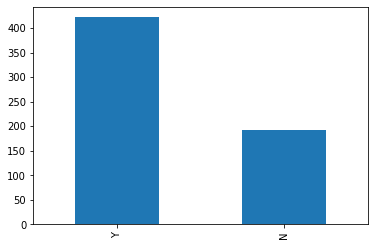

In [17]:
train["Loan_Status"].value_counts().plot.bar()

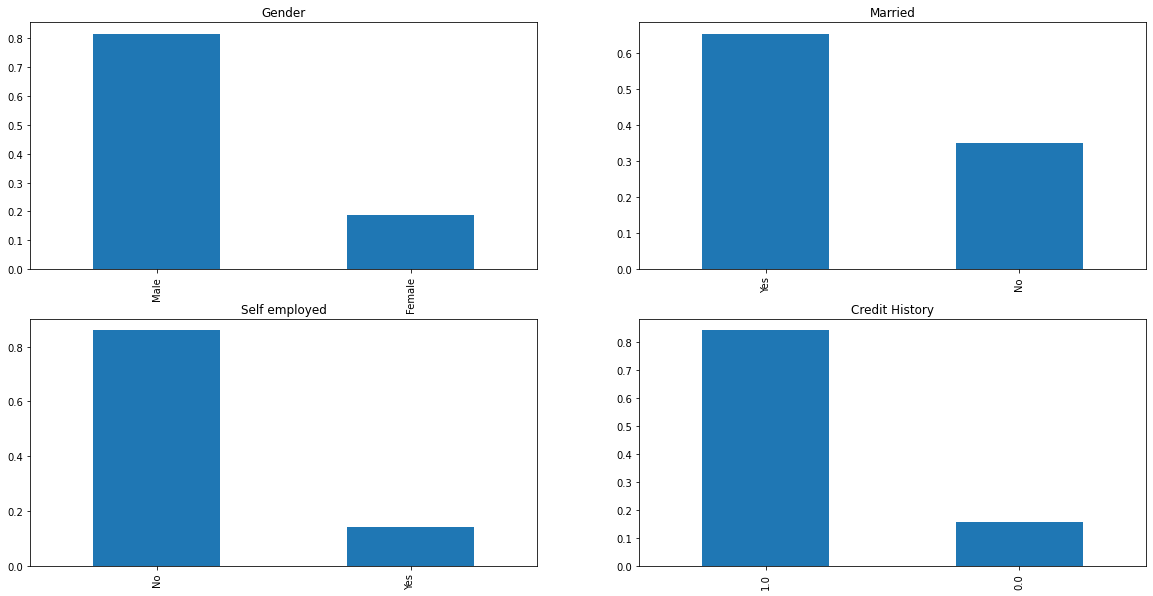

In [18]:
#plotting categorical features
plt.figure(1),plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self employed")
plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit History")
plt.show()

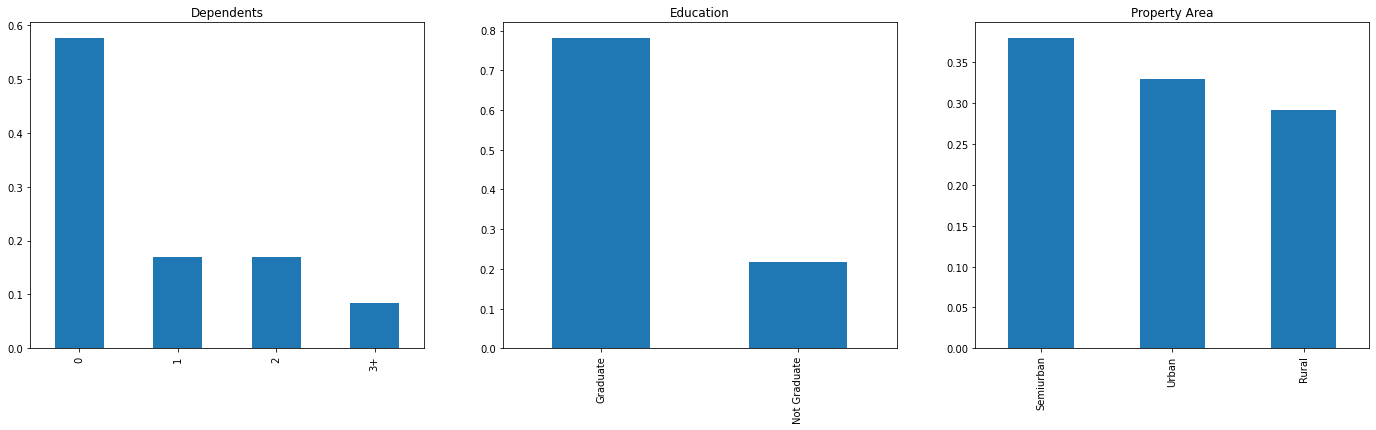

In [19]:
#ordinal features
plt.figure(1),plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property Area")
plt.show()

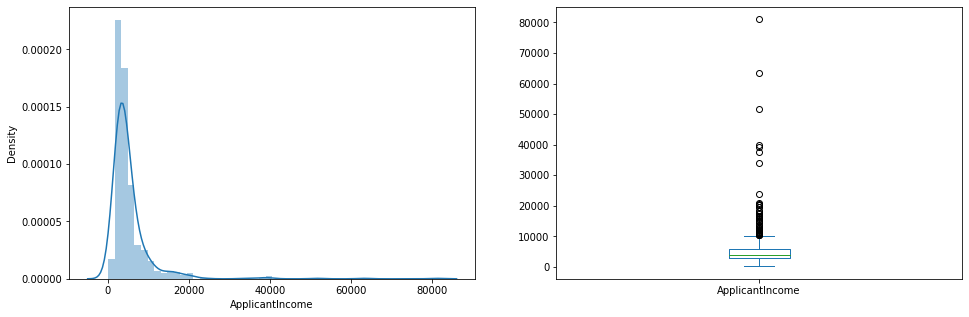

In [20]:
#numerical features
plt.figure(1),plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

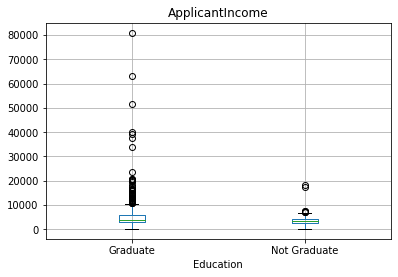

In [21]:
#segegating with education 
train.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")

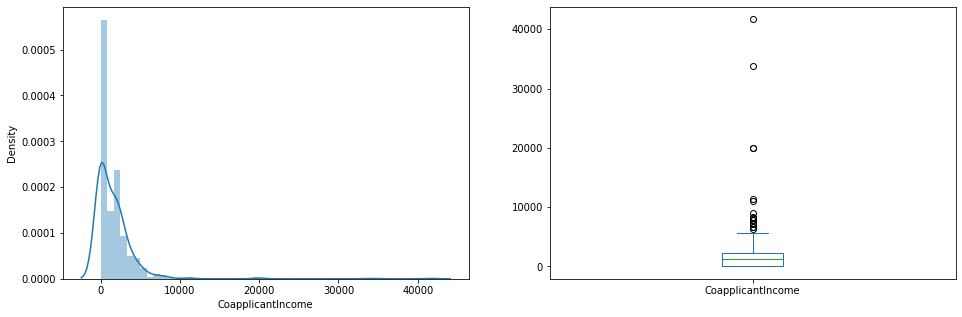

In [22]:
#coappplicant income
plt.figure(1),plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

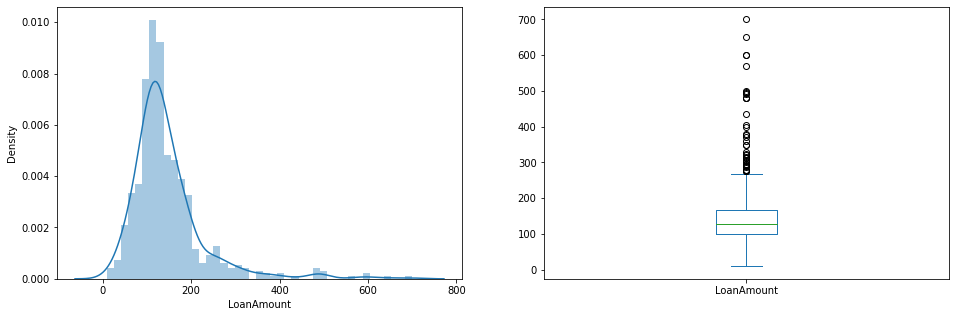

In [23]:
plt.figure(1),plt.subplot(121)
df=train.dropna()
sns.distplot(train["LoanAmount"])
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

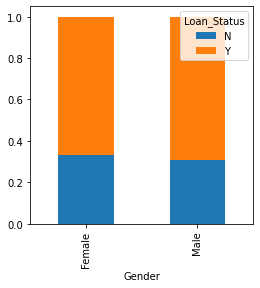

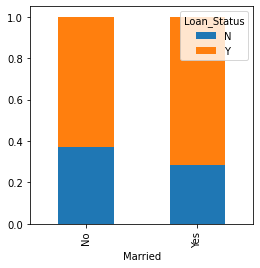

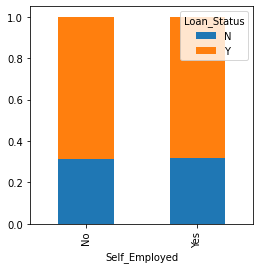

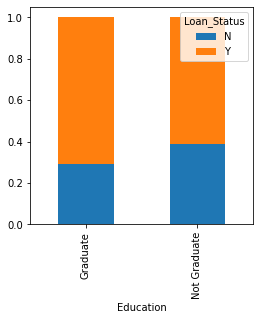

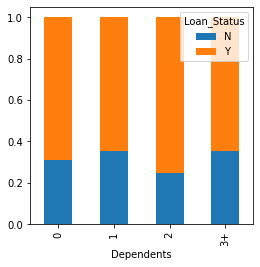

In [24]:
#Bivariate analysis
#categorical vs target variable
Gender=pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Education=pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

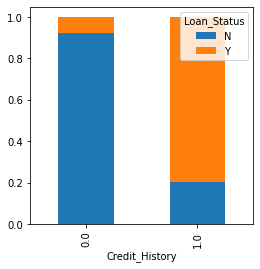

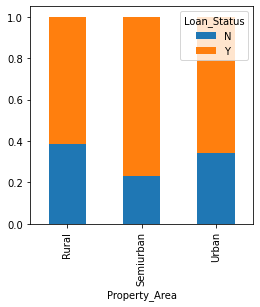

In [25]:
Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

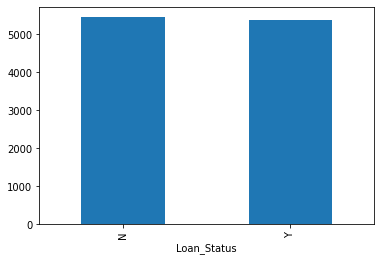

In [26]:
#numerical vs target
#plotting mean income for loan approval
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


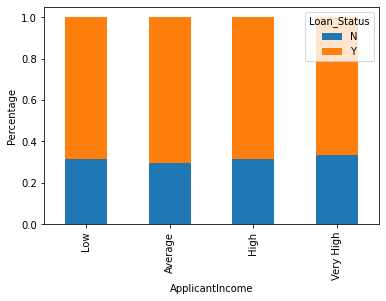

In [27]:
#grouping the income levels for loan approval
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()


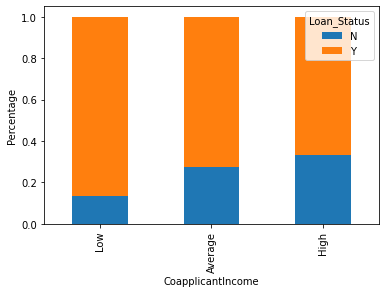

In [28]:
#coapplicant income vs target
bins=[0,1000,3000,42000]
group=['Low','Average','High']

train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

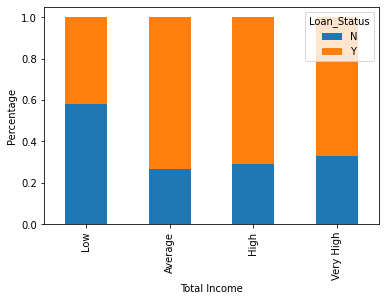

In [29]:
#combining both incomes
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Total Income")
plt.ylabel("Percentage")
plt.show()


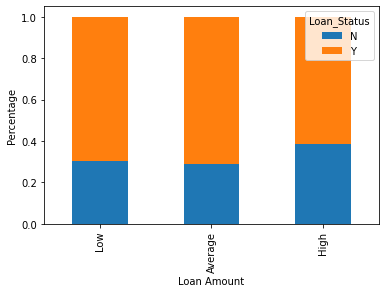

In [30]:
#visualizing loan amount
bins=[0,100,200,700]
group=['Low','Average','High']

train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Loan Amount")
plt.ylabel("Percentage")
plt.show()

In [31]:
#dropping exploration bins
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [32]:
#replacing values
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

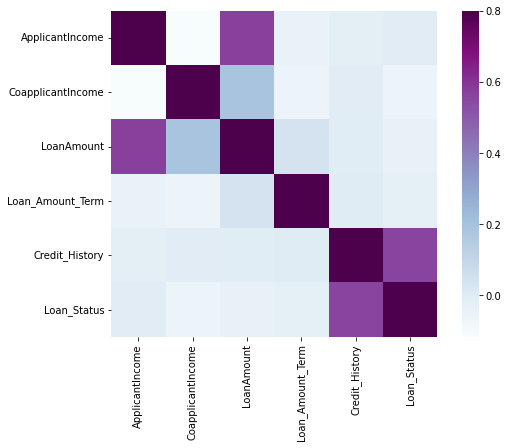

In [33]:
#correlation between numerical values
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")
plt.show()


In [34]:
#Missing value imputation and outlier treatment
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
#imputing categorical values using mode
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)


In [36]:
#checking loan amount term values
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
#360 is repeating most so filling  by mode
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [38]:
#filling Loan Amount value which is numerical by median
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
#filling test data with same approach
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Married"].fillna(train["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

<AxesSubplot:>

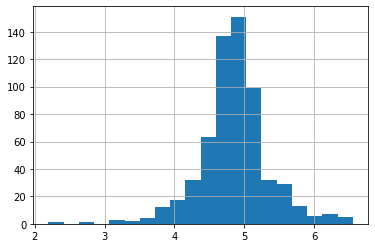

In [41]:
#Outlier treatment ...we have right skewness in distribution of Loan Amounts .. so we use log transformation for this
train['LoanAmount_log']=np.log(train["LoanAmount"]) #it makes normal distribution of data
train['LoanAmount_log'].hist(bins=20)

In [42]:
#log transformation on test data
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [43]:
#Building model with logistics regression and scikit learn
#dropping loan id first as its not relevant here
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [44]:
#sklearn requires target variable in different dataset 
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [45]:
#changing categorical values to numerical using dummy variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [46]:
pip install scikit-learn

You should consider upgrading via the 'C:\Users\Atish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [47]:
#splitting the data in training and validation set
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [48]:
#training the model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
model=LogisticRegression()
model.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,
                   multi_class='over',n_jobs=1,penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,
                  warm_start=False)

LogisticRegression(multi_class='over', n_jobs=1, random_state=1,
                   solver='liblinear')

In [50]:
#predicting with validation set and accuracy score
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [51]:
#prediction of test dataset
pred_test=model.predict(test)

In [52]:
#importing submission dataset to submit on solution checker
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [53]:
#replacing predicted value in submission set
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
#replacing Y and N with 1 and 0 in submission set
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [54]:
#saving submission file as our predicted csv file
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')
#upon submission we got score of 0.78

In [55]:
#Logistic regression using stratified k fold validation
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.8048780487804879

 2 of kfold 5
Accuracy score 0.8373983739837398

 3 of kfold 5
Accuracy score 0.7804878048780488

 4 of kfold 5
Accuracy score 0.7886178861788617

 5 of kfold 5
Accuracy score 0.7950819672131147


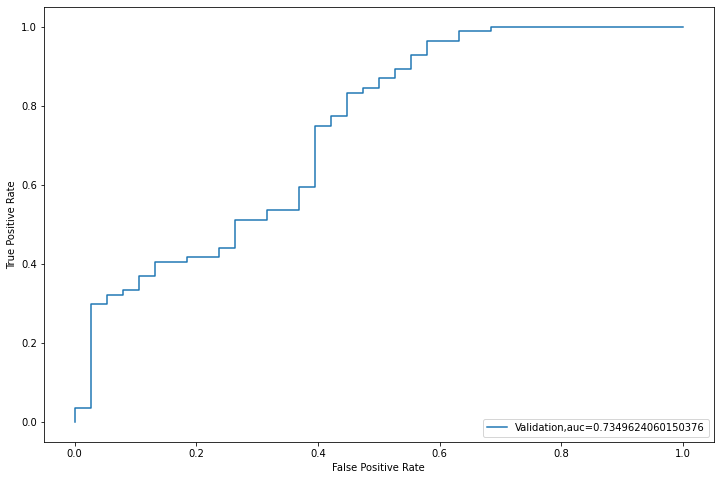

In [56]:
#ROC CURVE
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

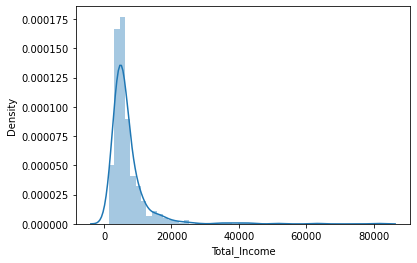

In [57]:
#feature engineering with new variables Total Income,EMI,Balane Income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

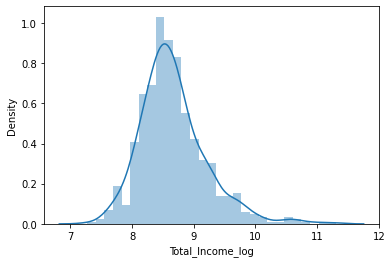

In [58]:
#dist plot is right skewed so taking log transformation
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

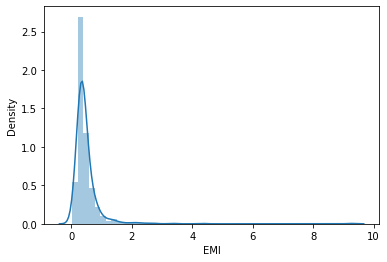

In [59]:
#EMI
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/train['Loan_Amount_Term']
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance_Income', ylabel='Density'>

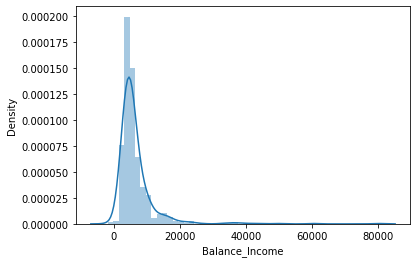

In [60]:
#balance income
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(train['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [61]:
#dropping old features to avoid high corr with new features and reduce noise
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [62]:
#Model Building II
#Using Logistic Regression in new features data
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [63]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.iloc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7886178861788617

 2 of kfold 5
Accuracy score 0.6910569105691057

 3 of kfold 5
Accuracy score 0.6666666666666666

 4 of kfold 5
Accuracy score 0.7804878048780488

 5 of kfold 5
Accuracy score 0.680327868852459


In [64]:
#Decison Tree
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7398373983739838

 2 of kfold 5
Accuracy score 0.6991869918699187

 3 of kfold 5
Accuracy score 0.7560975609756098

 4 of kfold 5
Accuracy score 0.7073170731707317

 5 of kfold 5
Accuracy score 0.6721311475409836


In [65]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.8292682926829268

 2 of kfold 5
Accuracy score 0.8130081300813008

 3 of kfold 5
Accuracy score 0.7723577235772358

 4 of kfold 5
Accuracy score 0.8048780487804879

 5 of kfold 5
Accuracy score 0.7540983606557377


In [74]:
#Now we can imporove score by hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

grid_search.fit(x_train,y_train)
GridSearchCV(cv=None,error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True,class_weight=None,
                                              criterion='gini',max_depth=None,max_features='auto',
                                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                              min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                                              n_estimators=10,n_jobs=1,oob_score=False,random_state=1,verbose=0),
            param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
            pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)

grid_search.best_estimator_
RandomForestClassifier(bootstrap=True,class_weight=None,
                                              criterion='gini',max_depth=3,max_features='auto',
                                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                              min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,
                                              n_estimators=41,n_jobs=1,oob_score=False,random_state=1,verbose=0)
#building the model now

i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred2=model.predict_proba(xvl)[:,1]



 1 of kfold 5
Accuracy score 0.8130081300813008

 2 of kfold 5
Accuracy score 0.8455284552845529

 3 of kfold 5
Accuracy score 0.8048780487804879

 4 of kfold 5
Accuracy score 0.7967479674796748

 5 of kfold 5
Accuracy score 0.7786885245901639


<AxesSubplot:>

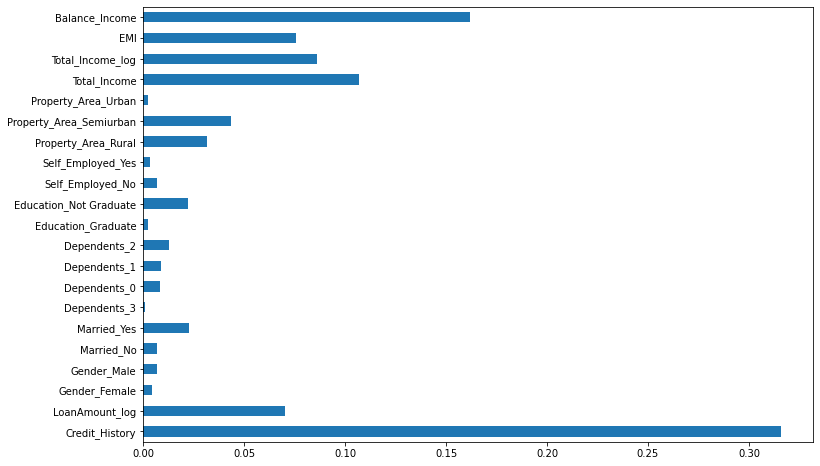

In [75]:
#finding feature importance 
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [77]:
pip install xgboost

You should consider upgrading via the 'C:\Users\Atish\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [78]:
#XGBoost
from xgboost import XGBClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
   
    model=XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("Accuracy score",score)
    i+=1
pred_test=model.predict(test)
pred3=model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy score 0.7804878048780488

 2 of kfold 5
Accuracy score 0.7886178861788617

 3 of kfold 5
Accuracy score 0.7642276422764228

 4 of kfold 5
Accuracy score 0.7804878048780488

 5 of kfold 5
Accuracy score 0.7622950819672131


In [85]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')